In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize

### Data load and preprocessing

In [551]:
df = pd.read_csv('dataset/AI_Companies.csv')

In [552]:
df.drop(axis=1, index=2261, inplace=True)
df.reset_index(inplace=True)

In [553]:
df = df.iloc[:,:-1]
df = df.drop_duplicates()
df = df.dropna()
df.sample(5)

,index,Company_Name,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus
2871,2872,QuantumSpace,https://quantumspacepteltd.com/,"Singapore, Singapore",Undisclosed,Undisclosed,10 - 49,20%
2426,2427,InfoskatersTechnologiesPvt.Ltd.,https://www.infoskaters.com/,"Bengaluru, India","$1,000+",$50 - $99 / hr,10 - 49,10%
692,692,Picovoice,https://picovoice.ai,"Vancouver, Canada","$10,000+",Undisclosed,10 - 49,100%
2869,2870,GlobalxSolutions,http://globalxsolutions.com,"Karachi, Pakistan","$1,000+",$25 - $49 / hr,10 - 49,20%
44,44,FusionHit,https://www.fusionhit.com/,"Heredia, Costa Rica","$10,000+",$50 - $99 / hr,50 - 249,10%


In [554]:
loc_split = df['Location'].str.split(pat=", ")
sizes = loc_split.apply(lambda x: len(x))
drop_mask = sizes > 2
loc_split = loc_split[~drop_mask]
new_df = df[~drop_mask]
sizes = sizes[~drop_mask]
new_df = new_df.loc[sizes.le(2)].copy()
new_split = loc_split.loc[new_df.index]
new_df['Country'] = new_split.str[-1].str.strip()
new_df['City']    = np.where(new_split.str.len().eq(2),
                             new_split.str[0].str.strip(), pd.NA)
new_df.drop(columns=['Location'], inplace=True)
new_df.reset_index(inplace=True, drop=True)
new_df['Country'] = new_df['Country'].apply(lambda x: x if len(x) > 2 else 'USA')

In [555]:
new_df['Minimum Project Size'].unique()

array(['Undisclosed', '$100,000+', '$1,000+', '$10,000+', '$50,000+',
       '$5,000+', '$25,000+', '$75,000+', '$250,000+'], dtype=object)

In [556]:
import re
def parse_avg(x):
    if pd.isna(x) or x in ['Undisclosed', 'Freelancer']:
        return None
    nums = [''.join(c for c in i if c.isdigit()) for i in x.split('-')]
    if not nums:
        return pd.NA
    vals = list(map(float, nums))
    return round(sum(vals) / len(vals)+.5)

In [557]:
new_df['Minimum Project Size'] = (
    new_df['Minimum Project Size']
      .apply(parse_avg)
      .astype(float)
)

new_df['Average Hourly Rate'] = (
    new_df['Average Hourly Rate']
      .apply(parse_avg)
      .astype(float)
)

new_df['Number of Employees'] = (
    new_df['Number of Employees']
      .apply(parse_avg)
      .astype(float)
)

new_df['Percent AI Service Focus'] = (
    new_df['Percent AI Service Focus']
      .apply(parse_avg)
      .astype(float)
)

new_df

,index,Company_Name,Website,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,Country,City
0,0,Smith.ai,https://smith.ai/,NaN,NaN,625.0,10.0,USA,Los Altos
1,1,MooveIt,https://moove-it.com/,100000.0,75.0,150.0,16.0,USA,Austin
2,2,TechSpeedInc,http://www.techspeed.com/,1000.0,26.0,150.0,40.0,USA,Portland
3,3,WillDom,https://willdom.com/,10000.0,75.0,625.0,10.0,USA,Fort Lauderdale
4,4,Icreon,https://www.icreon.com/en,50000.0,125.0,625.0,10.0,USA,New York
...,...,...,...,...,...,...,...,...,...
3076,3095,HurekaTechnologiesInc,http://www.hurekatek.com,10000.0,38.0,30.0,20.0,USA,New Brunswick
3077,3096,MYZEALI.T.SolutionsLLC,http://www.myzealit.com/,10000.0,38.0,625.0,10.0,USA,Los Angeles
3078,3097,Intelia,https://intelia.io/,25000.0,NaN,30.0,20.0,Nigeria,Lagos
3079,3098,MojoTrek,http://www.mojotrek.com,10000.0,75.0,30.0,26.0,USA,Chicago


### Data exploration/visualization

In [558]:
country_counts = new_df.groupby('Country')['Country'].value_counts().sort_values()

<BarContainer object of 20 artists>

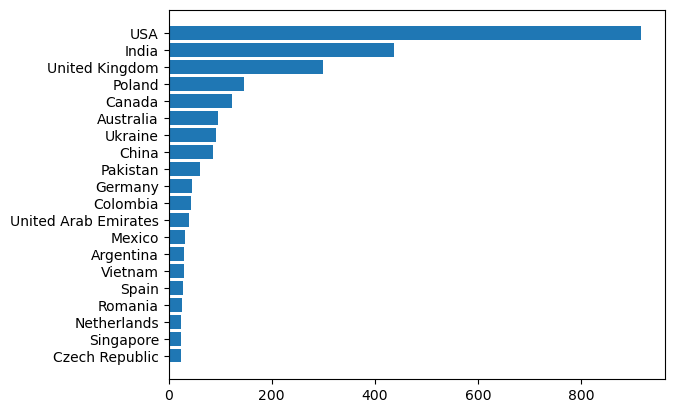

In [559]:
plt.barh(country_counts.index[-20:], country_counts[-20:])

In [560]:
country_counts

Country
unknown             1
Seychelles          1
Puerto Rico         1
Oman                1
Kosovo              1
                 ... 
Canada            122
Poland            147
United Kingdom    299
India             438
USA               916
Name: count, Length: 93, dtype: int64